In [4]:
import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch


import torch.optim as optim


from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

In [5]:
#import xgboost as xgb
#from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

'''
import onnxmltools
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster
'''

from zipfile import ZipFile
'''
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes)


# Import the ONNX runtime environment
import onnxruntime as rt
'''

'\nfrom skl2onnx.common.data_types import FloatTensorType\nfrom skl2onnx import convert_sklearn, to_onnx, update_registered_converter\nfrom skl2onnx.common.shape_calculator import (\n    calculate_linear_classifier_output_shapes,\n    calculate_linear_regressor_output_shapes)\n\n\n# Import the ONNX runtime environment\nimport onnxruntime as rt\n'

In [6]:





import PDFshapingUtils as PDF_tk


In [7]:
PDFshapingOBJ = PDF_tk.PDFshapingUtils()


Initialize Parameters

In [8]:
PDFshapingOBJ.N_error_range = 5         ## 20
PDFshapingOBJ.mean_impulse  = 0.0       ## -7.0      ## 0.0
PDFshapingOBJ.std_impulse   = 0.001     ## 1.0
PDFshapingOBJ.kde_std       = 0.5       ## 0.1       ## 0.5      ## 3.0  ## smaller is better approximation?
PDFshapingOBJ.bandwidth     = 0.2       ## 0.2->more jagged, 2.0->more smooth

In [9]:
PDFshapingOBJ.initializeImpulseGaussian()


Load Data

In [10]:
## PDFshapingOBJ.read_csv_file_with_pandas('energy_regression_dataset.csv')

PDFshapingOBJ.read_csv_file_with_pandas('/content/drive/MyDrive/Colab Notebooks Datasets/energy_regression_dataset.csv')

In [11]:
PDFshapingOBJ.CFD_raw_data


,hour,outdoor_temp,indoor_temp,humidity,energy_consumption,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40
0,0.000000,10.745071,11.023010,72.478828,75.982644,61.585211,65.618108,37.429039,44.857595,44.151325,...,10.643322,10.448882,52.960092,9.719455,52.153099,7.783675,6.619307,10.098288,60.264493,10.837604
1,0.004802,9.805175,10.671225,73.196799,68.692524,63.600577,61.146008,38.851982,40.962544,44.848480,...,12.872017,10.181208,48.047359,8.789595,46.351967,4.931613,7.145849,11.202895,54.134403,10.785812
2,0.009604,10.996676,11.371298,66.557241,72.286043,57.715643,62.655952,35.778125,41.866240,42.322046,...,12.632948,10.783965,50.844427,9.808211,49.871002,7.351686,8.664696,10.245641,59.352100,10.911997
3,0.014406,12.322259,11.495534,68.397074,72.568001,59.130755,62.580587,36.359287,43.083209,42.214772,...,11.149487,12.280930,51.061356,9.208008,47.968090,6.450987,9.874799,10.196709,57.627296,8.765799
4,0.019208,9.699055,10.654388,66.912524,71.220412,56.726233,63.764140,34.990815,40.041016,40.559662,...,10.238688,8.601545,51.537770,9.092166,49.205320,6.300923,8.485520,10.046729,56.448800,10.445902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,23.980792,8.963656,9.628876,71.162069,79.842166,61.775737,71.363390,39.010309,48.248118,44.940789,...,8.399299,7.280031,57.180371,7.605729,54.045712,3.949334,7.697772,6.543696,63.314617,8.573610
4995,23.985594,9.888838,11.530410,71.278332,87.720134,60.962008,76.862931,38.428856,52.194855,44.421433,...,10.996860,10.151727,62.083141,9.844630,61.335460,4.665666,9.567679,13.195102,69.496075,9.621131
4996,23.990396,11.041973,12.275735,68.530672,89.254143,59.435575,78.786912,37.395848,51.927067,43.793826,...,11.575464,9.914290,63.288548,9.535715,61.315558,5.385847,7.240887,11.382131,71.059189,10.024864
4997,23.995198,14.656794,12.794904,65.476883,90.445178,56.926128,79.072450,34.294128,51.916144,40.723600,...,14.369084,16.026645,63.096759,14.072371,60.603560,8.752273,11.008669,12.432658,71.517524,11.149549


In [12]:
PDFshapingOBJ.print_headers_list()


['hour', 'outdoor_temp', 'indoor_temp', 'humidity', 'energy_consumption', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40']
41
(0, 'hour')
(1, 'outdoor_temp')
(2, 'indoor_temp')
(3, 'humidity')
(4, 'energy_consumption')
(5, 'feature_5')
(6, 'feature_6')
(7, 'feature_7')
(8, 'feature_8')
(9, 'feature_9')
(10, 'feature_10')
(11, 'feature_11')
(12, 'feature_12')
(13, 'feature_13')
(14, 'feature_14')
(15, 'feature_15')
(16, 'feature_16')
(17, 'feature_17')
(18, 'feature_18')
(19, 'feature_19')
(20, 'feature_20')
(21, 'feature_21')
(22, 'feature_22')

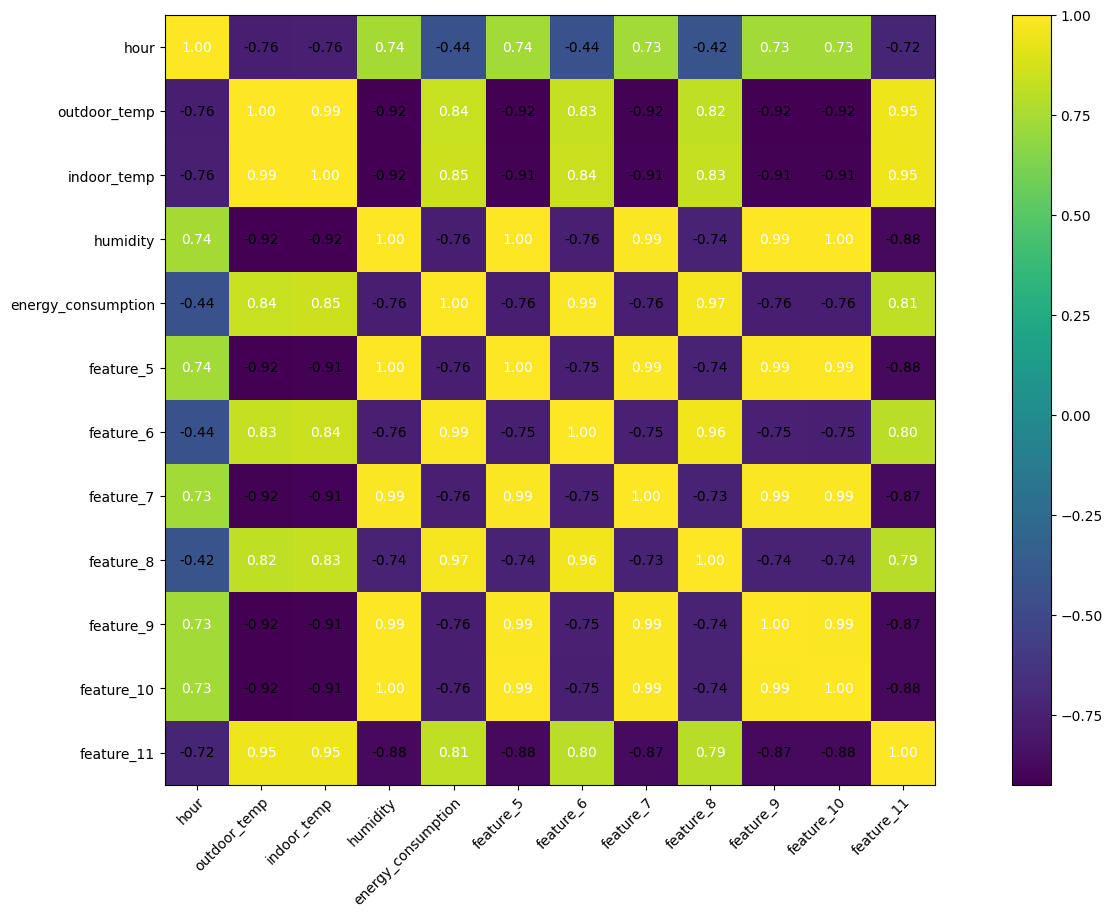

In [13]:
PDFshapingOBJ.list_of_selected_column_names = ['hour', 'outdoor_temp', 'indoor_temp', 'humidity', 'energy_consumption', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11']



PDFshapingOBJ.print_correlation_coefficients()

In [14]:
PDFshapingOBJ.convert_pd_data_to_numpy()


[[ 0.         10.74507123 11.02300994 ... 10.09828822 60.26449344
  10.83760425]
 [ 0.00480192  9.80517494 10.67122513 ... 11.20289537 54.13440295
  10.78581238]
 [ 0.00960384 10.99667558 11.37129829 ... 10.24564075 59.35209979
  10.91199688]
 ...
 [23.99039616 11.0419731  12.27573489 ... 11.38213055 71.05918882
  10.02486376]
 [23.99519808 14.65679391 12.79490386 ... 12.43265826 71.51752433
  11.14954916]
 [ 0.         11.21205428 11.37457421 ... 11.17368712 58.8544766
  10.86722097]]
(4999, 41)


Select inputs and outputs


In [15]:
PDFshapingOBJ.gen_X_y_for_selected_indeces(
                   inputs = [ 2, 3, 5, 6, 8, 9, 10 ] ,
                   outputs= [ 27, 29, 40 ]
)

7
3


In [16]:
print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)

(4999, 7)
(4999, 3)


In [17]:
PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [18]:
PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(3999, 7)
(1000, 7)
(3999, 3)
(1000, 3)


In [19]:
PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [20]:
PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()

In [21]:
PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl

In [22]:
n_inputs  = 7
n_outputs = 3


class SimpleNet(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations):
        super().__init__()
        self.x_means      = x_means
        self.x_deviations = x_deviations
        self.y_means      = y_means
        self.y_deviations = y_deviations

        self.model = nn.Sequential(
            nn.Linear(n_inputs, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, n_outputs)
        )

    def forward(self, x):
        x          = (x - self.x_means) / self.x_deviations
        y_scaled   = self.model(x)
        ## y_scaled   = torch.tanh(y_scaled)
        y_descaled = y_scaled * self.y_deviations + self.y_means

        return y_descaled, y_scaled

In [23]:
n_inputs  = 7
n_outputs = 3

class ResidualNet(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations
        self.y_means      = y_means
        self.y_deviations = y_deviations

        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()

    def forward(self, x):
        x          = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means

        return y_descaled, y_scaled

In [24]:
model     = ResidualNet(
             PDFshapingOBJ.x_means,
             PDFshapingOBJ.x_deviations,
             PDFshapingOBJ.y_means,
             PDFshapingOBJ.y_deviations
)

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()

In [25]:
model.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        optimizer.zero_grad()

        pred_descaled, pred_scaled = model(xb)

        loss = loss_fn(pred_scaled, yb)

        loss.backward()
        optimizer.step()

    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() )



0 ..... 0.06190241128206253
100 ..... 0.057393088936805725
200 ..... 0.05700709670782089
300 ..... 0.04302367568016052
400 ..... 0.05769004300236702
500 ..... 0.050617948174476624
600 ..... 0.023818572983145714
700 ..... 0.03346117213368416
800 ..... 0.04003846272826195
900 ..... 0.05200330540537834


In [26]:
print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)

'''
model.eval()
with torch.no_grad():
    test_input = get_x_from_z(z)
    y_descaled, y_scaled = model(test_input)

    print("x_guess:", test_input)
    print("y_scaled (standardized):", y_scaled)
    print("y_descaled (real units):", y_descaled)
'''

=== SANITY CHECK: SCALING ===
y_means: tensor([[65.2101,  8.4353, 10.0401]])
y_deviations: tensor([[14.0843,  3.5443,  4.1380]])
x_means: tensor([[11.0072, 70.1046, 60.0487, 68.1397, 46.2341, 43.2868, 50.8297]])
x_deviations: tensor([[ 4.3951, 15.1302, 12.9678,  6.4077,  4.4044,  9.3987, 11.0306]])


'\nmodel.eval()\nwith torch.no_grad():\n    test_input = get_x_from_z(z)\n    y_descaled, y_scaled = model(test_input)\n\n    print("x_guess:", test_input)\n    print("y_scaled (standardized):", y_scaled)\n    print("y_descaled (real units):", y_descaled)\n'

STEP 2: NIO

In [27]:
z_init = torch.rand((1, 7)) * 0.4 + 0.3              # middle of sigmoid range
z      = torch.nn.Parameter( torch.logit(z_init) )

print( z )

Parameter containing:
tensor([[-0.3152,  0.5838, -0.4905,  0.6125, -0.6357,  0.1838,  0.5378]],
       requires_grad=True)


In [28]:
def regularize_z(z, strength=1e-3):

    return strength * torch.sum(z**2)

In [29]:
regularize_z(  z  )

tensor(0.0018, grad_fn=<MulBackward0>)

Get x from z lambda function

In [30]:
get_x_from_z = lambda z: clamp_min + (clamp_max - clamp_min) * torch.sigmoid(z)


In [31]:
clamp_min = torch.tensor([[  0,   0,   0,    21,   0,   1300, 150 ]])     ## from Ty
clamp_max = torch.tensor([[  0, 200, 200,    32,   0,   1500, 250 ]])

In [32]:
x_guess_temp = get_x_from_z(z)
x_guess_temp

tensor([[   0.0000,  128.3897,   75.9542,   28.1335,    0.0000, 1409.1653,
          213.1293]], grad_fn=<AddBackward0>)

Soft penalty box for loss


In [33]:
def soft_box_penalty(x, lower, upper, strength=10.0):

    return strength * ((torch.relu(lower - x) ** 2).sum() + (torch.relu(x - upper) ** 2).sum())

In [34]:
soft_box_penalty(x_guess_temp, clamp_min, clamp_max, strength=10.0)

tensor(0., grad_fn=<MulBackward0>)

Inputs

In [35]:
z_init = torch.rand((1, 7)) * 0.4 + 0.3              # middle of sigmoid range
z      = torch.nn.Parameter( torch.logit(z_init) )


optimizer_infer = torch.optim.Adam([z], lr=0.03)     ## 0.05


scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer_infer, step_size=40000, gamma=0.5
)



print( z.shape )
print( z )

torch.Size([1, 7])
Parameter containing:
tensor([[-0.8439,  0.5767, -0.2726,  0.3370,  0.4682, -0.7894, -0.0372]],
       requires_grad=True)


Outputs

In [36]:
'''

Top gas temp > 100C,,,,,,,,,,,(27, 'o_tgt')
Hot metal temp > 1700K........(29, 'o_hmt')
Raceway flame temp > 1900K.....(40, 'o_fta')


'''


target_output_not_scaled   = torch.tensor([[70., 1800., 2600.]])

margin_out                  = torch.tensor([[1e6, 1e6, 200.0]])   ## 1e6 = 1 million


#######################################################################################

lower_bounds_glob    = target_output_not_scaled.clone()
upper_bounds_glob    = target_output_not_scaled  + margin_out

print( lower_bounds_glob  )
print( upper_bounds_glob  )

#######################################################################################

lower_bounds_glob    = ( lower_bounds_glob - PDFshapingOBJ.y_means) / PDFshapingOBJ.y_deviations
upper_bounds_glob    = ( upper_bounds_glob - PDFshapingOBJ.y_means) / PDFshapingOBJ.y_deviations

#######################################################################################


target_output   = ( target_output_not_scaled - PDFshapingOBJ.y_means) / PDFshapingOBJ.y_deviations

tensor([[  70., 1800., 2600.]])
tensor([[1000070., 1001800.,    2800.]])


Parameters

In [37]:
## constraint_mask = torch.tensor([  2,     2,      2   ])   # 2 = ≥, 0 = no constraint

## constraint_weights = torch.tensor([3.0, 8.0, 4.0])            # Penalize all more
## constraint_weights = torch.tensor([3.0, 16.0, 8.0])  # was [3.0, 8.0, 4.0]
## constraint_weights = torch.tensor([1.0, 5.0, 1.0])         # Heavier weight on hot metal temp

## overshoot_margin   = torch.tensor([200.0, 50.0, 20.0])  # Limits o_fta to ≤ 2100
## overshoot_margin   = torch.tensor([100.0, 50.0, 10.0])       # Tighter!
## overshoot_margin   = torch.tensor([500.0, 100.0, 50.0])    # Tolerable overshoot per output
## overshoot_margin   = torch.tensor([100.0, 100.0, 50.0])    # Tolerable overshoot per output

In [38]:
constraint_mask = torch.tensor([  2,     2,      3  ])  # o_fta is now “within range”


print( constraint_mask )


overshoot_margin     = torch.tensor([10.0, 30.0, 100.0])


constraint_weights   = torch.tensor([1.0, 3.0, 1.0])

alpha = 0.9

tensor([2, 2, 3])


In [39]:
def constraint_loss(y_pred, y_target, mask, overshoot_margin, weights, reg_weight=1e-4):

    loss = 0.0

    for i in range( y_pred.shape[1] ):

        weight = weights[i]
        if mask[i] == 1:  # equality constraint

            loss = loss + weight * (   y_pred[0, i] - y_target[0, i]   )**2

        elif mask[i] == 2:  # ≥ constraint
            # Penalize undershoot
            loss = loss + weight * torch.relu(  y_target[0, i] - y_pred[0, i]  )**2
            # Penalize excessive overshoot
            safe_upper = y_target[0, i] + overshoot_margin[i]
            loss = loss + weight * torch.relu(  y_pred[0, i] - safe_upper  )**2

        elif mask[i] == 3:  # bounded range
            a = lower_bounds_glob[0, i]
            b = upper_bounds_glob[0, i]
            loss = loss + weight * torch.relu(a - y_pred[0, i])**2
            loss = loss + weight * torch.relu(y_pred[0, i] - b)**2

    # Regularization on output predictions
    loss = loss + reg_weight * torch.sum(y_pred**2)
    return loss

In [40]:
'''

Inputs

(2, 'i_h2i_rate'):  0 to 100
(3, 'i_h2_temp'):   0 to 1500
(4, 'i_ngi_rate'):  0 to 300
(6, 'i_pci_rate'):  0 to 300
(11, 'i_o2_volfract'): 21 to 40
(12, 'i_hbtemp'): 1200 to 1500
(13, 'i_wind_rt'): 150 to 250


other inputs:

(2, 'i_h2i_rate'):  0
(3, 'i_h2_temp'):   0
(4, 'i_ngi_rate'): 0 to 200
(6, 'i_pci_rate'): 0 to 200
(11, 'i_o2_volfract'): 21 to 32
(12, 'i_hbtemp'): 1300 to 1500
(13, 'i_wind_rt'): 150 to 250


'''

"\n\nInputs\n\n(2, 'i_h2i_rate'):  0 to 100\n(3, 'i_h2_temp'):   0 to 1500\n(4, 'i_ngi_rate'):  0 to 300\n(6, 'i_pci_rate'):  0 to 300\n(11, 'i_o2_volfract'): 21 to 40\n(12, 'i_hbtemp'): 1200 to 1500\n(13, 'i_wind_rt'): 150 to 250\n\n\nother inputs:\n\n(2, 'i_h2i_rate'):  0\n(3, 'i_h2_temp'):   0\n(4, 'i_ngi_rate'): 0 to 200\n(6, 'i_pci_rate'): 0 to 200\n(11, 'i_o2_volfract'): 21 to 32\n(12, 'i_hbtemp'): 1300 to 1500\n(13, 'i_wind_rt'): 150 to 250\n\n\n"

In [41]:
## input clamps



'''


(2, 'i_h2i_rate')


(3, 'i_pci_rate')
(5, 'i_ngi_rate')
(6, 'i_o2_volfract')
(8, 'i_h2_temp')


(9, 'i_hbtemp')
(10, 'i_wind_rt')



'''

clamp_min = torch.tensor([[  0,   0,   0,    21,   0,   1300, 150 ]])     ## from Ty
clamp_max = torch.tensor([[  0, 200, 200,    32,   0,   1500, 250 ]])



## clamp_min = torch.tensor([[    0,      0,   0,    0, 21, 1200, 150 ]])     ## from Ty
## clamp_max = torch.tensor([[  100,   1500, 300,  300, 40, 1500, 250 ]])

NIO Optimization loop

In [42]:
epochs = 200000

for step in range(epochs ):

    optimizer_infer.zero_grad()

    x_guess                    = get_x_from_z(z)

    y_pred_real, y_pred_scaled = model(x_guess)

    loss_main     = constraint_loss(y_pred_scaled, target_output, constraint_mask,
                                      overshoot_margin, constraint_weights)

    loss_soft     = soft_box_penalty(x_guess, clamp_min, clamp_max, strength=10.0)
    loss_z_reg    = regularize_z(z, strength=1e-3)


    loss = alpha * loss_main + (1 - alpha) * loss_soft + loss_z_reg

    loss.backward()
    optimizer_infer.step()

    scheduler.step()

    if step % 20000 == 0:
      print( "z", z       )
      print("x_guess", x_guess )
      print( "target_output_not_scaled", target_output_not_scaled )
      print( "y_pred_real", y_pred_real  )
      print( "y_pred_scaled", y_pred_scaled )
      print( "target_output_scaled", target_output )
      print( "clamp_min", clamp_min )
      print( "clamp_max", clamp_max )
      print( loss.item() )
      print(  step       )
      print('==================')

z Parameter containing:
tensor([[-0.8139,  0.6067, -0.2426,  0.3670,  0.4382, -0.8194, -0.0072]],
       requires_grad=True)
x_guess tensor([[   0.0000,  128.0606,   86.4528,   27.4182,    0.0000, 1362.4612,
          199.0692]], grad_fn=<AddBackward0>)
target_output_not_scaled tensor([[  70., 1800., 2600.]])
y_pred_real tensor([[  37.1988, -297.5895,  -61.2803]], grad_fn=<AddBackward0>)
y_pred_scaled tensor([[ -1.9888, -86.3440, -17.2354]], grad_fn=<AddmmBackward0>)
target_output_scaled tensor([[    0.3401,   505.4848,   625.8925]])
clamp_min tensor([[   0,    0,    0,   21,    0, 1300,  150]])
clamp_max tensor([[   0,  200,  200,   32,    0, 1500,  250]])
1317963.5
0
z Parameter containing:
tensor([[     0.0000,     13.7376,     13.6269,      9.5491,      0.0000,
            -14.0990,     14.6865]], requires_grad=True)
x_guess tensor([[   0.0000,  199.9998,  199.9998,   31.9992,    0.0000, 1300.0001,
          250.0000]], grad_fn=<AddBackward0>)
target_output_not_scaled tensor([[  70

In [43]:
model.eval()
with torch.no_grad():

    final_input     = get_x_from_z(z)    ## .detach().numpy()
    final_output, _ = model( final_input )


print( final_input.shape )
print( final_output.shape )

torch.Size([1, 7])
torch.Size([1, 3])


In [44]:
print("target_output_not_scaled ", target_output_not_scaled )
print( "clamp_min", clamp_min )
print( "clamp_max", clamp_max )


print("=======================================")
print("\nInput that satisfies constraints:")
print("Input:", np.round(final_input, 2))
print("Predicted Output:", np.round(final_output, 2))

target_output_not_scaled  tensor([[  70., 1800., 2600.]])
clamp_min tensor([[   0,    0,    0,   21,    0, 1300,  150]])
clamp_max tensor([[   0,  200,  200,   32,    0, 1500,  250]])

Input that satisfies constraints:
Input: tensor([[   0.,  200.,  200.,   32.,    0., 1300.,  250.]])
Predicted Output: tensor([[ 132.7800, -164.8700,  -26.1800]])


In [45]:
'''


Inputs


(2, 'i_h2i_rate'):       0 to 100
(3, 'i_h2_temp'):        0 to 1500
(4, 'i_ngi_rate'):       0 to 300
(6, 'i_pci_rate'):       0 to 300
(11, 'i_o2_volfract'):  21 to 40
(12, 'i_hbtemp'):     1200 to 1500
(13, 'i_wind_rt'):     150 to 250


Outputs
desired output requirements
Raceway flame temp > 1900K.....(19, 'o_fta')
Hot metal temp > 1700K.........(21, 'o_hmt')
Top gas temp > 100C,,,,,,,,,,,.(23, 'o_tgt')




'''

"\n\n\nInputs\n\n\n(2, 'i_h2i_rate'):       0 to 100\n(3, 'i_h2_temp'):        0 to 1500\n(4, 'i_ngi_rate'):       0 to 300\n(6, 'i_pci_rate'):       0 to 300\n(11, 'i_o2_volfract'):  21 to 40\n(12, 'i_hbtemp'):     1200 to 1500\n(13, 'i_wind_rt'):     150 to 250\n\n\nOutputs\ndesired output requirements\nRaceway flame temp > 1900K.....(19, 'o_fta')\nHot metal temp > 1700K.........(21, 'o_hmt')\nTop gas temp > 100C,,,,,,,,,,,.(23, 'o_tgt')\n\n\n\n\n"

In [46]:
print("\nFinal Input:", np.round(final_input, 2))
print("Final Predicted Output:", np.round(final_output, 2))
print("Target Output:", target_output_not_scaled)

violations = final_output < target_output_not_scaled
if violations.any():
    print("❌ Final output violates constraints:")
    print("Violated constraints:", violations)
else:
    print("✅ All constraints satisfied.")

fta = final_output[0, 0].item()
if fta > 2100:
    print(f"⚠️ WARNING: o_fta = {fta:.2f}K is unphysically high.")


Final Input: tensor([[   0.,  200.,  200.,   32.,    0., 1300.,  250.]])
Final Predicted Output: tensor([[ 132.7800, -164.8700,  -26.1800]])
Target Output: tensor([[  70., 1800., 2600.]])
❌ Final output violates constraints:
Violated constraints: tensor([[False,  True,  True]])


Search/Try several times

In [47]:
def run_with_retry(model, get_x_from_z, target_output_not_scaled, target_output,
                   constraint_mask, overshoot_margin, constraint_weights,
                   lower_bounds_glob, upper_bounds_glob,
                   clamp_min, clamp_max,
                   constraint_loss_fn, soft_box_penalty_fn, regularize_z_fn,
                   alpha=0.9, max_steps=200000, retries=5):

    for attempt in range(retries):
        z_init = torch.rand((1, 7)) * 0.4 + 0.3
        z = torch.nn.Parameter(torch.logit(z_init))
        optimizer_infer = torch.optim.Adam([z], lr=0.05)

        for step in range(max_steps):
            optimizer_infer.zero_grad()
            x_guess = get_x_from_z(z)
            y_pred_real, y_pred_scaled = model(x_guess)

            loss_main = constraint_loss_fn(y_pred_scaled, target_output, constraint_mask,
                                           overshoot_margin, constraint_weights)
            loss_soft = soft_box_penalty_fn(x_guess, clamp_min, clamp_max)
            loss_z    = regularize_z_fn(z)

            loss = alpha * loss_main + (1 - alpha) * loss_soft + loss_z
            loss.backward()
            optimizer_infer.step()

            # Evaluate result
        with torch.no_grad():
            final_input = get_x_from_z(z)
            final_output, _ = model(final_input)

        violations = final_output < target_output_not_scaled
        o_fta = final_output[0, 0].item()

        if not violations.any() and o_fta <= 2100:
            print("✅ Success after", attempt + 1, "attempt(s).")
            print("Input:", np.round(final_input.numpy(), 2))
            print("Output:", np.round(final_output.numpy(), 2))
            return final_input, final_output

        else:
            print(f"❌ Attempt {attempt+1} failed — retrying...")

    print("⚠️ No feasible solution found after", retries, "attempts.")
    return None, None

In [48]:
'''

final_input, final_output = run_with_retry(
    model=model,
    get_x_from_z=get_x_from_z,
    target_output_not_scaled=target_output_not_scaled,
    target_output=target_output,
    constraint_mask=constraint_mask,
    overshoot_margin=overshoot_margin,
    constraint_weights=constraint_weights,
    lower_bounds_glob=lower_bounds_glob,
    upper_bounds_glob=upper_bounds_glob,
    clamp_min=clamp_min,
    clamp_max=clamp_max,
    constraint_loss_fn=constraint_loss,
    soft_box_penalty_fn=soft_box_penalty,
    regularize_z_fn=regularize_z,
    alpha=0.9,
    max_steps=200000,
    retries=5
)

'''

'\n\nfinal_input, final_output = run_with_retry(\n    model=model,\n    get_x_from_z=get_x_from_z,\n    target_output_not_scaled=target_output_not_scaled,\n    target_output=target_output,\n    constraint_mask=constraint_mask,\n    overshoot_margin=overshoot_margin,\n    constraint_weights=constraint_weights,\n    lower_bounds_glob=lower_bounds_glob,\n    upper_bounds_glob=upper_bounds_glob,\n    clamp_min=clamp_min,\n    clamp_max=clamp_max,\n    constraint_loss_fn=constraint_loss,\n    soft_box_penalty_fn=soft_box_penalty,\n    regularize_z_fn=regularize_z,\n    alpha=0.9,\n    max_steps=200000,\n    retries=5\n)\n\n'